In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pathlib as p
import joblib as j

In [2]:
path = p.Path('../data/processed/data_set.csv')

df = pd.read_csv(path)
df.head()

,id,edad,genero,estrato,residencia,estado_civil,periodo_inicio,repitencias_total,semestre_1,semestre_2,...,semestre_12,semestre_13,semestre_14,semestre_15,semestre_16,semestre_17,semestre_18,semestre_19,semestre_20,desertor
0,1,37,1,2,0,0,201860,1,3.9,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,35,1,2,1,2,202110,0,4.1,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,57,1,2,0,2,202310,8,4.3,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,31,1,2,0,0,201910,0,4.1,3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5,32,1,2,0,0,202310,1,4.2,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
# [Preparar los datos]
X = df.drop('desertor',axis=1) # Esto es con lo que vamos a entrenar el modelo
y = df['desertor'] # Lo probaremos con estos datos

In [4]:
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state= 42)

# Tamaño del conjunto de prueba del 20 %
# random_state es como la semilla para reproducir la misma aleatoriedad

In [5]:
model = LogisticRegression(max_iter=5000) # Se crea el modelo

model.fit(X_train, y_train) # Se entrena el modelo

LogisticRegression(max_iter=5000)

In [6]:
y_pred = model.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

print('Matriz de confusion',confusion_matrix(y_test,y_pred))

print('Classification Report',classification_report(y_test,y_pred))

Accuracy Score 0.9239130434782609
Matriz de confusion [[55  1]
 [ 6 30]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.98      0.94        56
           1       0.97      0.83      0.90        36

    accuracy                           0.92        92
   macro avg       0.93      0.91      0.92        92
weighted avg       0.93      0.92      0.92        92



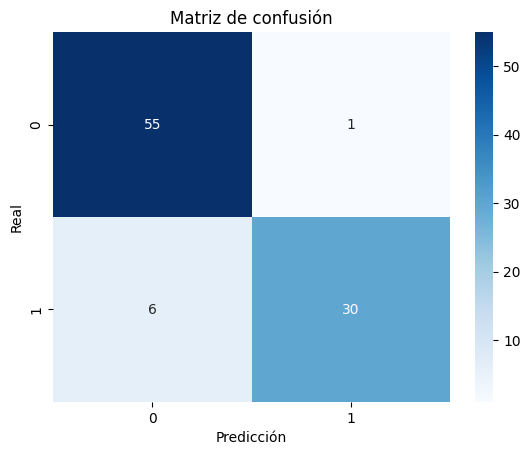

In [7]:
matriz_confusion = confusion_matrix(y_test,y_pred)

sns.heatmap(matriz_confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [8]:
path_save = p.Path('../models/modelo_regresion_logistica.pkl')
j.dump(model,path_save)

['..\\models\\modelo_regresion_logistica.pkl']